In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch
import matplotlib.pyplot as plt

## Callbacks

### Callbacks as GUI events

In [3]:
import ipywidgets as widgets

In [4]:
def f(o): print("hi")

From the [ipywidget docs](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Events.html):

- *the button widget is used to handle mouse clicks. The on_click method of the Button can be used to register function to be called when the button is clicked*

In [5]:
w = widgets.Button(description='Click me')

In [6]:
w

Button(description='Click me', style=ButtonStyle())

In [7]:
w.on_click(f)

In [8]:
w

Button(description='Click me', style=ButtonStyle())

*NB: When callbacks are used in this way they are often called "events".*

Did you know what you can create interactive apps in Jupyter with these widgets? Here's an example from [plotly](https://plot.ly/python/widget-app/):

![](https://cloud.githubusercontent.com/assets/12302455/16637308/4e476280-43ac-11e6-9fd3-ada2c9506ee1.gif)

### Creating your own callback

In [9]:
from time import sleep

In [10]:
def slow_calculation():
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
    return res

In [11]:
slow_calculation()

30

In [12]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        res += i*i
        sleep(1)
        if cb: cb(i)
    return res

In [13]:
def show_progress(epoch):
    print(f"Awesome! We have finished epoch: {epoch}!")

In [14]:
slow_calculation(show_progress)

Awesome! We have finished epoch: 0!
Awesome! We have finished epoch: 1!
Awesome! We have finished epoch: 2!
Awesome! We have finished epoch: 3!
Awesome! We have finished epoch: 4!


30

### Lambdas and partials

In [15]:
slow_calculation(lambda o: print(f"Awesome! We have finished epoch: {o}!") )

Awesome! We have finished epoch: 0!
Awesome! We have finished epoch: 1!
Awesome! We have finished epoch: 2!
Awesome! We have finished epoch: 3!
Awesome! We have finished epoch: 4!


30

In [16]:
def show_progress(exclamation, epoch): print(f"{exclamation}! We have finished epoch: {epoch}!") 

In [17]:
slow_calculation(show_progress)

TypeError: show_progress() missing 1 required positional argument: 'epoch'

In [18]:
slow_calculation(lambda o: show_progress("OK, I Guess", o))

OK, I Guess! We have finished epoch: 0!
OK, I Guess! We have finished epoch: 1!
OK, I Guess! We have finished epoch: 2!
OK, I Guess! We have finished epoch: 3!
OK, I Guess! We have finished epoch: 4!


30

In [21]:
def make_show_progress(exclamation):
    _inner = lambda epoch: print(f"{exclamation}!, We've finished epoch: {epoch}")
    return _inner

In [23]:
slow_calculation(make_show_progress("Nice!"))

Nice!!, We've finished epoch: 0
Nice!!, We've finished epoch: 1
Nice!!, We've finished epoch: 2
Nice!!, We've finished epoch: 3
Nice!!, We've finished epoch: 4


30

In [24]:
def make_show_progress(exclamation):
    def _inner(epoch): print(f"{exclamation}!, We have finished epoch: {epoch}")
    return _inner

In [26]:
slow_calculation(make_show_progress("Nice"))

Nice!, We have finished epoch: 0
Nice!, We have finished epoch: 1
Nice!, We have finished epoch: 2
Nice!, We have finished epoch: 3
Nice!, We have finished epoch: 4


30

In [27]:
f2 = make_show_progress("Terrific")

In [ ]:
slow_calculation(f2)

Terrific! We've finished epoch 0!
Terrific! We've finished epoch 1!
Terrific! We've finished epoch 2!
Terrific! We've finished epoch 3!
Terrific! We've finished epoch 4!


30

In [30]:
slow_calculation(make_show_progress("Amazing"))

Amazing!, We have finished epoch: 0
Amazing!, We have finished epoch: 1
Amazing!, We have finished epoch: 2
Amazing!, We have finished epoch: 3
Amazing!, We have finished epoch: 4


30

using `partial` (for our function `show_progress` )

In [31]:
from functools import partial

In [34]:
slow_calculation(partial(show_progress, "OK I guess"))

OK I guess! We have finished epoch: 0!
OK I guess! We have finished epoch: 1!
OK I guess! We have finished epoch: 2!
OK I guess! We have finished epoch: 3!
OK I guess! We have finished epoch: 4!


30

In [36]:
f2 = partial(show_progress, "OK I guess")

In [38]:
# shift-tab here inside f2()
f2()

### Callbacks as callable classes

In [39]:
class ProgressShowingCallback():
    def __init__(self, exclamation='Awesome'): self.exclamation = exclamation
    def __call__(self, epoch): print(f"{self.exclamation}! We have completed epoch {epoch} ") 

In [43]:
cb = ProgressShowingCallback("Just super")

In [45]:
cb("hi")

Just super! We have completed epoch hi 


In [44]:
slow_calculation(cb)

Just super! We have completed epoch 0 
Just super! We have completed epoch 1 
Just super! We have completed epoch 2 
Just super! We have completed epoch 3 
Just super! We have completed epoch 4 


30

### Multiple callback funcs; `*args` and `**kwargs`

In [46]:
def f(*args, **kwargs): print(f"args: {args}, kwargs: {kwargs}")

In [49]:
f(3, 'a', thing1="hello")

args: (3, 'a'), kwargs: {'thing1': 'hello'}


NB: We've been guilty of over-using kwargs in fastai - it's very convenient for the developer, but is annoying for the end-user unless care is taken to ensure docs show all kwargs too. kwargs can also hide bugs (because it might not tell you about a typo in a param name). In [R](https://www.r-project.org/) there's a very similar issue (R uses `...` for the same thing), and matplotlib uses kwargs a lot too.

In [85]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb: cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb: cb.after_calc(i, val=res)
    return res

In [86]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, *args, **kwargs): print(f"About to start")
    def after_calc (self, *args, **kwargs): print(f"Done step")        

In [87]:
slow_calculation(PrintStepCallback())

About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step
About to start
Done step


30

In [92]:
class PrintStepCallback():
    def __init__(self): pass
    def before_calc(self, epoch, **kwargs): print(f"About to start: epoch{epoch}")
    def after_calc (self, epoch, val, **kwargs): print(f"After epoch{epoch}: result={val}")        

In [93]:
slow_calculation(PrintStepCallback())

About to start: epoch0
After epoch0: result=0
About to start: epoch1
After epoch1: result=1
About to start: epoch2
After epoch2: result=5
About to start: epoch3
After epoch3: result=14
About to start: epoch4
After epoch4: result=30


30

### Modifying behavior

In [94]:
def slow_calculation(cb=None):
    res = 0
    for i in range(5):
        if cb and hasattr(cb, "before_calc"): cb.before_calc(i)
        res += i*i
        sleep(1)
        if cb and hasattr(cb, "after_calc"):
            if cb.after_calc(i, val=res):
                print("stopping early")
                break
    return res

In [98]:
class PrintStepCallback():
    def after_calc (self, epoch, val):
        if val>10: return True
        print(f"After epoch{epoch}: result={val}")

In [99]:
slow_calculation(PrintStepCallback())

After epoch0: result=0
After epoch1: result=1
After epoch2: result=5
stopping early


14

In [141]:
class ShowCalculator():
    def __init__(self, cb): self.cb, self.res = cb, 0
        
    def callback(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb, cb_name, None)
        if cb: return cb(self, *args) # self is ShowCalculator object which contains res
        
    def calc(self):
        for i in range(5):
            self.callback('before_calc', i)
            self.res += i*i 
            sleep(1)
            if self.callback('after_calc', i):
                print("stopping early")
                break

In [142]:
class ModifyingCallback():
    def after_calc(self, calc, epoch):
        print(f"After epoch{epoch}: result={calc.res}")        
        if calc.res > 10: return True
        if calc.res < 7: calc.res *= 2

In [143]:
calculator = ShowCalculator(ModifyingCallback())

In [144]:
calculator.calc()
calculator.res

After epoch0: result=0
After epoch1: result=1
After epoch2: result=6
After epoch3: result=21
stopping early


21

In [146]:
class ShowCalculator():
    def __init__(self, cb): self.cb, self.res = cb, 0
        
    def __call__(self, cb_name, *args):
        if not self.cb: return
        cb = getattr(self.cb, cb_name, None)
        if cb: return cb(self, *args) # self is ShowCalculator object which contains res
        
    def calc(self):
        for i in range(5):
            self('before_calc', i)
            self.res += i*i 
            sleep(1)
            if self('after_calc', i):
                print("stopping early!")
                break

class ModifyingCallback():
    def after_calc(self, calc, epoch):
        print(f"After epoch{epoch}: result={calc.res}")        
        if calc.res > 10: return True
        if calc.res < 7: calc.res *= 2
        
calculator = ShowCalculator(ModifyingCallback())
calculator.calc()
calculator.res

After epoch0: result=0
After epoch1: result=1
After epoch2: result=6
After epoch3: result=21
stopping early!


21

## `__dunder__` thingies

Anything that looks like `__this__` is, in some way, *special*. Python, or some library, can define some functions that they will call at certain documented times. For instance, when your class is setting up a new object, python will call `__init__`. These are defined as part of the python [data model](https://docs.python.org/3/reference/datamodel.html#object.__init__).

For instance, if python sees `+`, then it will call the special method `__add__`. If you try to display an object in Jupyter (or lots of other places in Python) it will call `__repr__`.

In [151]:
class SloppyAdder():
    def __init__(self,o): self.o=o
    def __add__(self, b:object): return SloppyAdder(self.o + b.o + 0.01)
    def __repr__(self): return str(self.o)

In [152]:
a = SloppyAdder(1)
b = SloppyAdder(2)
a + b

3.01

Special methods you should probably know about (see [data model](https://docs.python.org/3/reference/datamodel.html#object.__init__) link above) are:

- `__getitem__(self, key)` : Called to implement evaluation of self[key]
- `__getattr__(self, name)` : Called when the default attribute access fails with an AttributeError. This should either return   the (computed) attribute value or raise an AttributeError exception. 
- `__setattr__(self, name, value)` : Called when an attribute assignment is attempted
- `__del__(self)` : Called when the instance is about to be destroyed
- `__init__(self[, ...])` : Called after the instance has been created (by `__new__()`), but before it is returned to the caller 
- `__new__(cls[, ...])` : Called to create a new instance of class cls
- `__enter__(self)` : Enter the runtime context related to this object
- `__exit__(self, exc_type, exc_value, traceback)` : Exit the runtime context related to this object
- `__len__(self)` : Called to implement the built-in function len(). Should return the length of the object (integer >= 0)
- `__repr__` : Called by the repr() built-in function to compute the “official” string representation of an object
- `__str__` : Called by str(object) and the built-in functions format() and print() to compute the “informal” or nicely printable string representation of an object

In [ ]:
Called to implement evaluation of self[key]

## Variance and stuff

### Variance

Variance is the average of how far away each data point is from the mean. E.g.:

In [154]:
t = torch.tensor([1.,2.,4.,18])

In [166]:
m = t.mean();
m

tensor(6.2500)

In [156]:
(t-m).mean()

tensor(0.)

Oops. We can't do that. Because by definition the positives and negatives cancel out. So we can fix that in one of (at least) two ways:

In [157]:
(t-m).pow(2).mean() # variance

tensor(47.1875)

In [159]:
(t-m).abs().mean() # mean absolute deviation

tensor(5.8750)

But the first of these is now a totally different scale, since we squared. So let's undo that at the end.

In [160]:
(t-m).pow(2).mean().sqrt() # std

tensor(6.8693)

They're still different. Why?

Note that we have one outlier (`18`). In the version where we square everything, it makes that much bigger than everything else.

`(t-m).pow(2).mean()` is referred to as **variance**. It's a measure of how spread out the data is, and is particularly sensitive to outliers.

When we take the sqrt of the variance, we get the **standard deviation**. Since it's on the same kind of scale as the original data, it's generally more interpretable. However, since `sqrt(1)==1`, it doesn't much matter which we use when talking about *unit variance* for initializing neural nets.

`(t-m).abs().mean()` is referred to as the **mean absolute deviation**. It isn't used nearly as much as it deserves to be, because mathematicians don't like how awkward it is to work with. But that shouldn't stop us, because we have computers and stuff.

Here's a useful thing to note about variance:

In [164]:
(t-m).pow(2).mean(), (t*t).mean() - (m*m)

(tensor(47.1875), tensor(47.1875))

You can see why these are equal if you want to work thru the algebra. Or not.

But, what's important here is that the latter is generally much easier to work with. In particular, you only have to track two things: the sum of the data, and the sum of squares of the data. Whereas in the first form you actually have to go thru all the data twice (once to calculate the mean, once to calculate the differences).

Let's go steal the LaTeX from [Wikipedia](https://en.wikipedia.org/wiki/Variance):

$$\operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2$$

### Covariance and correlation

Here's how Wikipedia defines covariance:

$$\operatorname{cov}(X,Y) = \operatorname{E}{\big[(X - \operatorname{E}[X])(Y - \operatorname{E}[Y])\big]}$$

In [167]:
t

tensor([ 1.,  2.,  4., 18.])

Let's see that in code. So now we need two vectors.

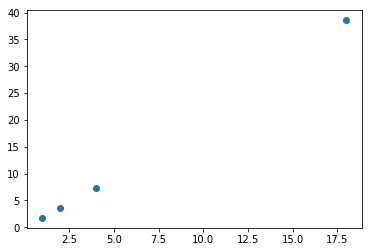

In [171]:
# `u` is twice `t`, plus a bit of randomness
u = t*2
u *= torch.randn_like(t)/10 + 0.95
plt.scatter(t,u);

In [172]:
prod = (t-t.mean()) * (u-u.mean()); prod

tensor([ 58.0846,  39.1999,  12.2560, 302.3787])

In [173]:
prod.mean()

tensor(102.9798)

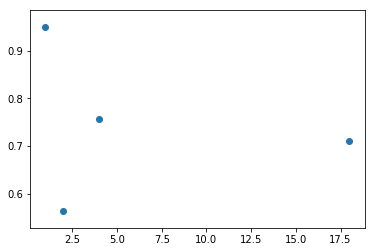

In [175]:
v = torch.rand_like(t)
plt.scatter(t, v);

In [180]:
((t-t.mean())*(v-v.mean())).mean()

tensor(-0.1861)

In [181]:
t,u,v

(tensor([ 1.,  2.,  4., 18.]),
 tensor([ 1.7551,  3.5953,  7.3717, 38.5532]),
 tensor([0.9501, 0.5627, 0.7571, 0.7097]))

It's generally more conveniently defined like so:

$$\operatorname{E}\left[X Y\right] - \operatorname{E}\left[X\right] \operatorname{E}\left[Y\right]$$

E[ ] => mean()

In [183]:
cov = (t*v).mean() - t.mean()*v.mean();cov 

tensor(-0.1861)

From now on, you're not allowed to look at an equation (or especially type it in LaTeX) without also typing it in Python and actually calculating some values. Ideally, you should also plot some values.

Finally, here is the Pearson correlation coefficient:

$$\rho_{X,Y}= \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}$$

In [188]:
corr = cov / (t.std() * v.std());corr

tensor(-0.1467)

It's just a scaled version of the same thing. Question: *Why is it scaled by standard deviation, and not by variance or mean or something else?*

## Softmax

Here's our final `logsoftmax` definition:

In [191]:
from exp.nb_03 import pp

In [196]:
torch.sum()
a = torch.randn(4, 4)
pp(torch.sum(a, -1),torch.sum(a, 1),torch.sum(a, 0))

tensor([ 1.5587, -0.7677, -2.0883,  1.1026])
------------------------------------------------------------------------------------------------------------------------
tensor([ 1.5587, -0.7677, -2.0883,  1.1026])
------------------------------------------------------------------------------------------------------------------------
tensor([ 1.4818, -0.1442,  0.2437, -1.7760])
------------------------------------------------------------------------------------------------------------------------


In [197]:
def log_softmax(x): return x - x.exp().sum(-1, keepdim=True).log()

which is:

$$\hbox{logsoftmax(x)}_{i} = x_{i} - \log \sum_{j} e^{x_{j}}$$ 

And our cross entropy loss is:
$$-\log(p_{i})$$

## Browsing source code

- Jump to tag/symbol by with (with completions)
- Jump to current tag
- Jump to library tags
- Go back
- Search
- Outlining / folding